## Extraction

In [69]:
import pandas as pd
import requests
import json
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

In [70]:
euro_real_raw = requests.get("https://economia.awesomeapi.com.br/json/daily/EUR-BRL/180")

In [71]:
euro_real_json = euro_real_raw.json()

## Manipulation

In [72]:
euro_real_df = pd.DataFrame(euro_real_json)[["high", "low", "timestamp"]]

In [73]:
euro_real_df["timestamp"] = euro_real_df["timestamp"].astype("int")

In [74]:
euro_real_df["high"] = euro_real_df["high"].astype("float")

In [75]:
euro_real_df["low"] = euro_real_df["low"].astype("float")

In [76]:
euro_real_df["date"] = pd.to_datetime(euro_real_df["timestamp"], unit="s", origin = "unix")

In [77]:
euro_real_df["date"] = euro_real_df["date"].dt.date

In [78]:
euro_real_df = euro_real_df.drop(columns = ["timestamp"])

In [79]:
euro_real_df["price"] = (euro_real_df["high"] + euro_real_df["low"]) / 2

In [80]:
euro_real_df = euro_real_df.iloc[:,2:]

In [81]:
euro_real_df = euro_real_df.sort_values(by = "date", ascending = True)

In [82]:
def rolling_avg_var_x_days(df, n_days):
    col_name_avg = "avg_last_" + str(n_days) + "_days"
    df[col_name_avg] = df["price"].rolling(window = n_days).mean()
    col_name_var = "var_today_avg_last_" + str(n_days) + "_days"
    df[col_name_var] = (df["price"] - df[col_name_avg])
    df = df.sort_index()
    df = df.dropna()
    return df

In [83]:
euro_real_df = rolling_avg_var_x_days(euro_real_df, 15)

In [84]:
euro_real_df.head()

,date,price,avg_last_15_days,var_today_avg_last_15_days
0,2024-04-29,5.4983,5.535267,-0.036967
1,2024-04-28,5.5349,5.531737,0.003163
2,2024-04-26,5.5065,5.525767,-0.019267
3,2024-04-25,5.5402,5.522687,0.017513
4,2024-04-24,5.5076,5.517027,-0.009427


In [85]:
euro_real_df = euro_real_df.sort_values(by = "date", ascending = True)

In [86]:
def rolling_min_var_x_days(df, n_days):
    col_name_min = "min_last_" + str(n_days) + "_days"
    df[col_name_min] = df["price"].rolling(window = n_days).min()
    col_name_var = "var_today_min_last_" + str(n_days) + "_days"
    df[col_name_var] = (df["price"] - df[col_name_min])
    df = df.sort_index()
    df = df.dropna()
    return df

In [87]:
euro_real_df = rolling_min_var_x_days(euro_real_df, 15)

In [89]:
euro_real_df["price"] = round(euro_real_df["price"], 2)

In [90]:
euro_real_df["min_last_15_days"] = round(euro_real_df["min_last_15_days"], 2)

In [91]:
euro_real_df["is_best_price_last_15_days"] = np.where(euro_real_df.price == euro_real_df.min_last_15_days, 1, 0)

## Visualisation

''

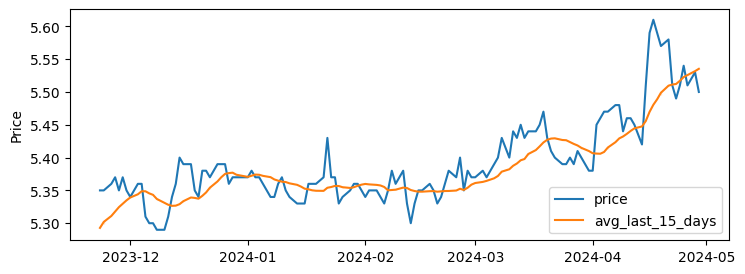

In [94]:
price_avg_df = euro_real_df[["date", "price", "avg_last_15_days"]].melt(value_vars = ["price", "avg_last_15_days"], id_vars = "date")
plt.figure(figsize = (8.5, 3))
sns.lineplot(data = price_avg_df, x = "date", y = "value", hue = "variable")
plt.ylabel("Price")
plt.xlabel("")
plt.legend(title = "", loc = "lower right")
;

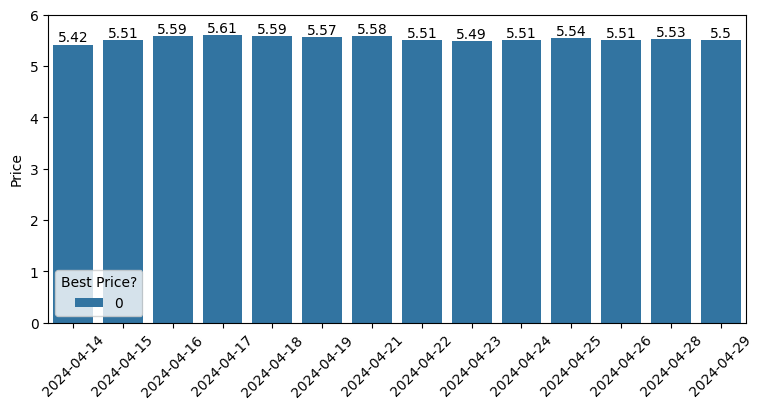

In [95]:
data_seg = euro_real_df.head(15)
data_seg = data_seg.sort_values("date")

is_two_axis = []
for linha in data_seg["is_best_price_last_15_days"]:
    if linha == 1:
        two_axis = True
        is_two_axis.append(two_axis)
    else:
        two_axis = False
        is_two_axis.append(two_axis)

if True in is_two_axis:
    plt.figure(figsize = (9, 4))
    ax = sns.barplot(data = data_seg, x = "date", y = "price", hue = "is_best_price_last_15_days")
    ax.legend(title = "Best Price?", loc = "lower left")
    ax.bar_label(ax.containers[0], fontsize = 10)
    plt.bar_label(ax.containers[1], fontsize = 10)
    plt.xticks(rotation=45)
    plt.xlabel("")
    plt.ylabel("Price")
    plt.ylim(0, 6);
if True not in is_two_axis:
    plt.figure(figsize = (9, 4))
    ax = sns.barplot(data = data_seg, x = "date", y = "price", hue = "is_best_price_last_15_days")
    ax.legend(title = "Best Price?", loc = "lower left")
    ax.bar_label(ax.containers[0], fontsize = 10)
    plt.xticks(rotation=45)
    plt.xlabel("")
    plt.ylabel("Price")
    plt.ylim(0, 6);